# Figure creation

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
import random
import pickle
import os
import math
import numpy as np
from nbcache import cacheable
from tqdm.notebook import tqdm

@cacheable('mnist.pickle')
def get_mnist():
    return fetch_openml('mnist_784', data_home='../datasets')

mnist = get_mnist()


Loading from cache mnist.pickle...


In [2]:
# training data
X_trn = mnist.data.iloc[0:60000].to_numpy().astype('float32')
X_trn = X_trn.reshape(X_trn.shape[0], 28, 28) # reshape to images
y_trn = mnist.target.iloc[0:60000].to_numpy().astype('float32')

y_trn = np.vstack([y for y in y_trn]) # jankily turn this into a column vector

# test data
X_tst = mnist.data.iloc[60000:70000].to_numpy().astype('float32')
X_tst = X_tst.reshape(X_tst.shape[0], 28, 28) # reshape to images
y_tst = mnist.target.iloc[60000:70000].to_numpy().astype('float32')
y_tst = np.vstack([y for y in y_tst])

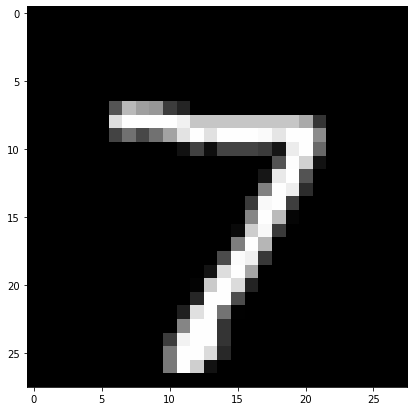

In [3]:
plt.imshow(X_tst[0], cmap='gray', vmin=0, vmax=255)

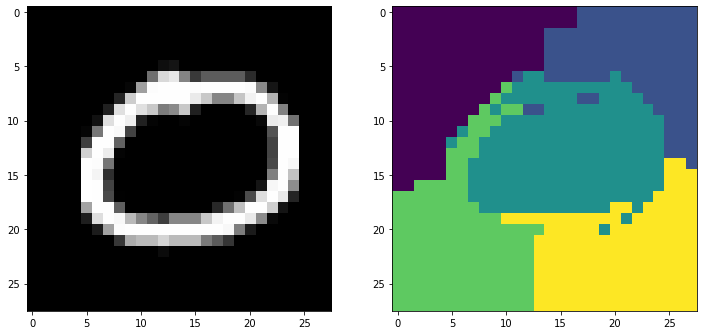

In [4]:
# skimage: quickshift
from skimage.segmentation import quickshift
from skimage.color import gray2rgb

X_tst_example_rgb = gray2rgb(X_tst[69]/255)
segmented = quickshift(X_tst_example_rgb.astype('double'), kernel_size=1, max_dist=200, ratio=0.2)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(X_tst_example_rgb)
ax2.imshow(segmented)

plt.show()

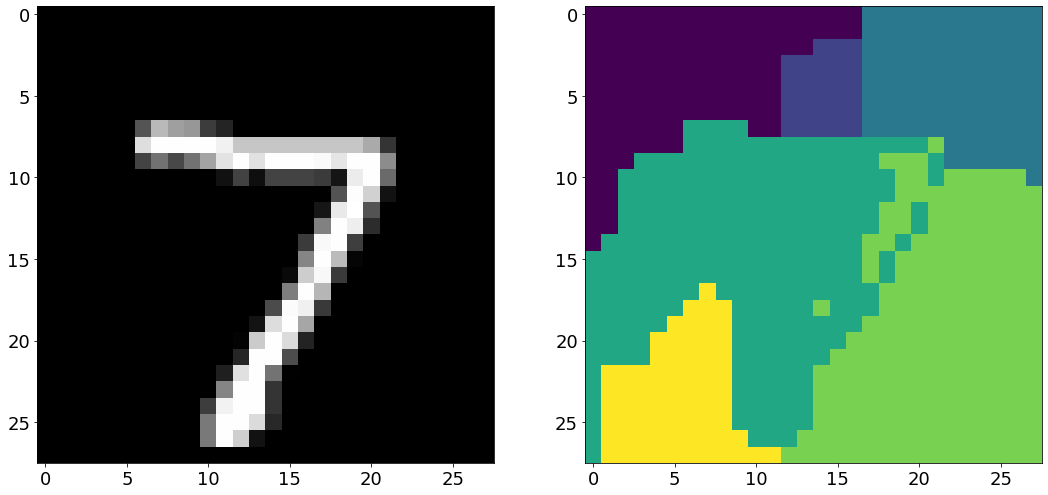

In [38]:
# skimage: quickshift
from skimage.segmentation import quickshift
from skimage.color import gray2rgb

X_tst_example_rgb = gray2rgb(X_tst[0]/255)
segmented = quickshift(X_tst_example_rgb.astype('double'), kernel_size=1, max_dist=200, ratio=0.2)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(X_tst_example_rgb)
ax2.imshow(segmented)

plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit([x.flatten() for x in X_tst])
pca.components_

array([[-8.47026835e-18, -3.83134834e-19,  1.08060297e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.35909013e-17, -2.87190080e-20, -2.35415614e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.54619597e-17, -6.19678182e-18,  2.78147355e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.73177793e-17, -4.81426659e-17, -5.15964566e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.34202064e-17,  2.87481425e-17,  1.75146187e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.48107575e-17, -2.88354574e-17,  3.91713091e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

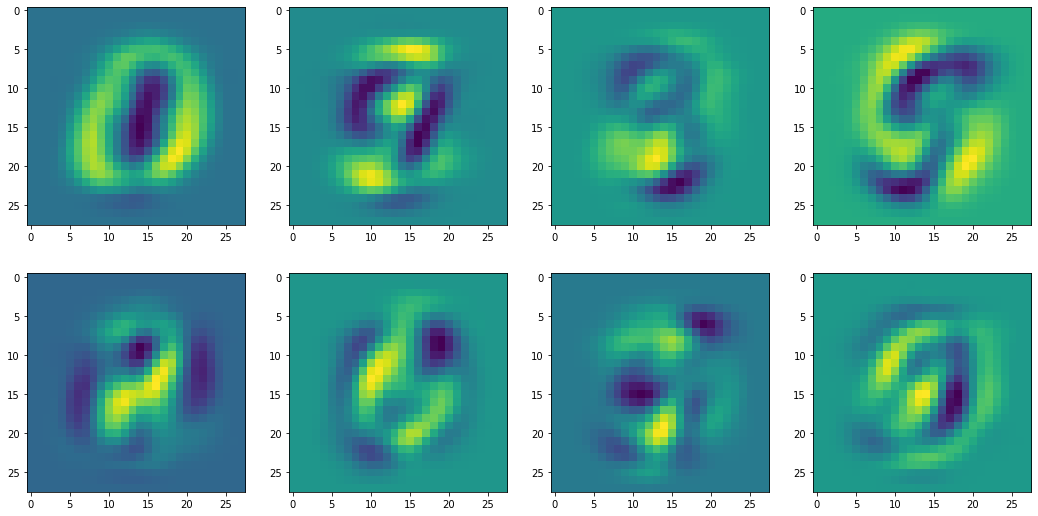

In [6]:
plt.rcParams['figure.figsize'] = [18, 9]
fig, axs = plt.subplots(2,4)

for i,ax in enumerate(np.ravel(axs)):
    ax.imshow(pca.components_[i].reshape(28,28))
#     ax.imshow(X_tst[i], cmap='gray', vmin=0, vmax=255)

# Latent structure image

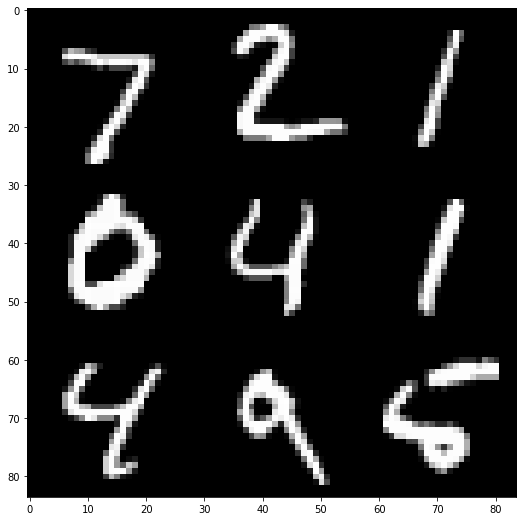

In [11]:
def show_img_square(imgs):
    side_len = math.sqrt(len(imgs))
    
    if side_len != math.floor(side_len):
        raise ValueError('Non-square dimensions!')
    
    side_len = int(side_len)
    
    MNIST_DIM = 28
    
    out = np.zeros((MNIST_DIM * side_len, MNIST_DIM * side_len))
#     print(out.shape)
                    
    for idx, img in enumerate(imgs):
        startx = math.floor(idx / side_len)
        starty = int(idx % side_len)
#         print(startx, starty)
        startx *= MNIST_DIM
        starty *= MNIST_DIM
#         print('\t', startx, starty)
        for i in range(MNIST_DIM):
            for j in range(MNIST_DIM):
                out[startx + i][starty + j] = img[i][j]
    
    return out
sq = show_img_square(X_tst[:9])
plt.imshow(sq, cmap='gray', vmin=0, vmax=255)

In [24]:
def show_mnist_square(ax, label1, label2=None):
    if label2 is not None:
        idxs, _ = np.where(np.bitwise_or((y_tst == label1), (y_tst == label2)))
        ax.set_title(f'Labels {label1} and {label2}')
        sigf = 1
    else:
        idxs, _ = np.where(y_tst == label1)
        ax.set_title(f'Label {label1} only')
        sigf = .5
    sq = show_img_square(X_tst[idxs[:25]] * sigf)
    
    ax.imshow(sq, cmap='gray', vmin=0, vmax=255)

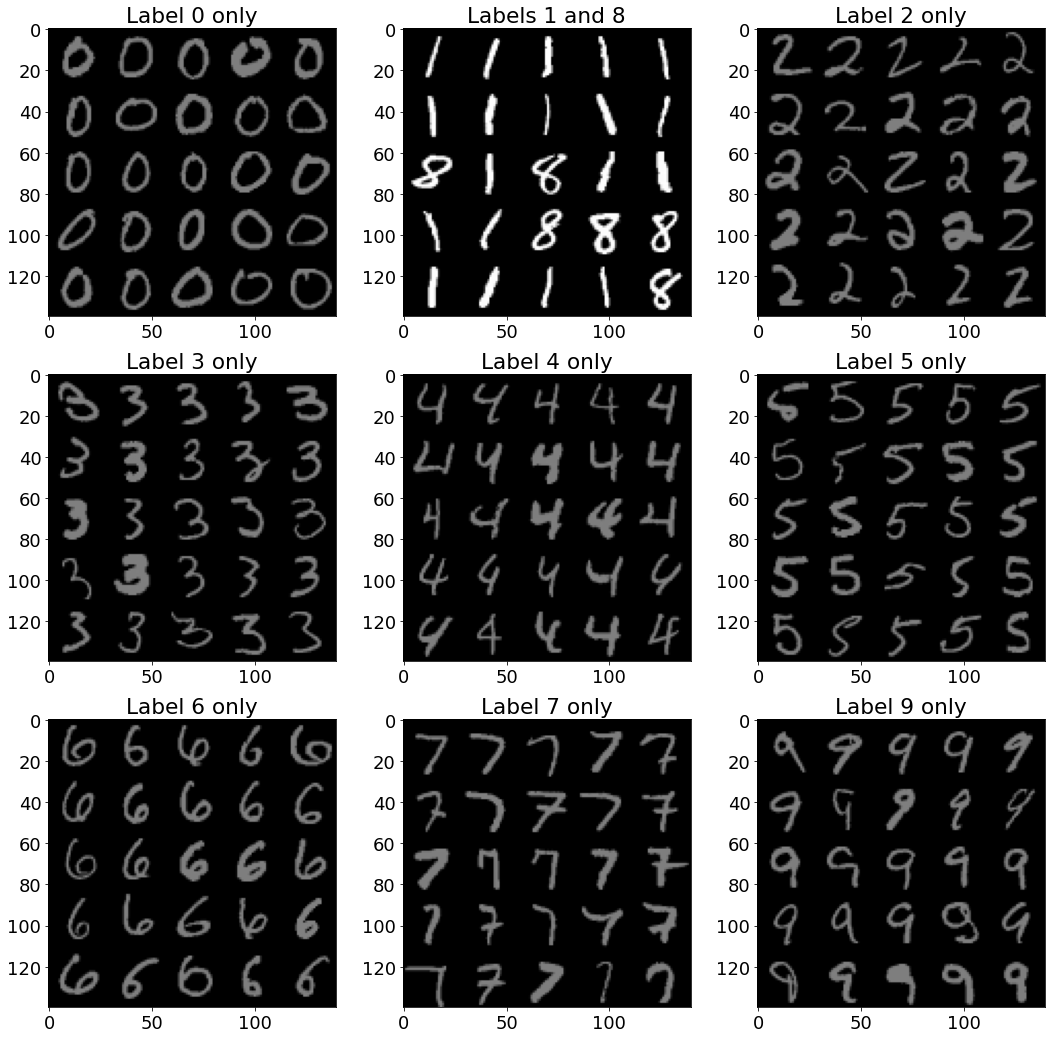

In [27]:
plt.rcParams['figure.figsize'] = [18, 18]
plt.rcParams['font.size'] = 18
# matplotlib.rcParams.update({'font.size': 22})

labels = [
    (0, ),
    (1,8),
    (2, ),
    (3, ),
    (4, ),
    (5, ),
    (6, ),
    (7, ),
    (9, )
]

fig, axs = plt.subplots(3,3)

for lbl, ax in zip(labels, np.ravel(axs)):
    show_mnist_square(ax, *lbl)

plt.show()

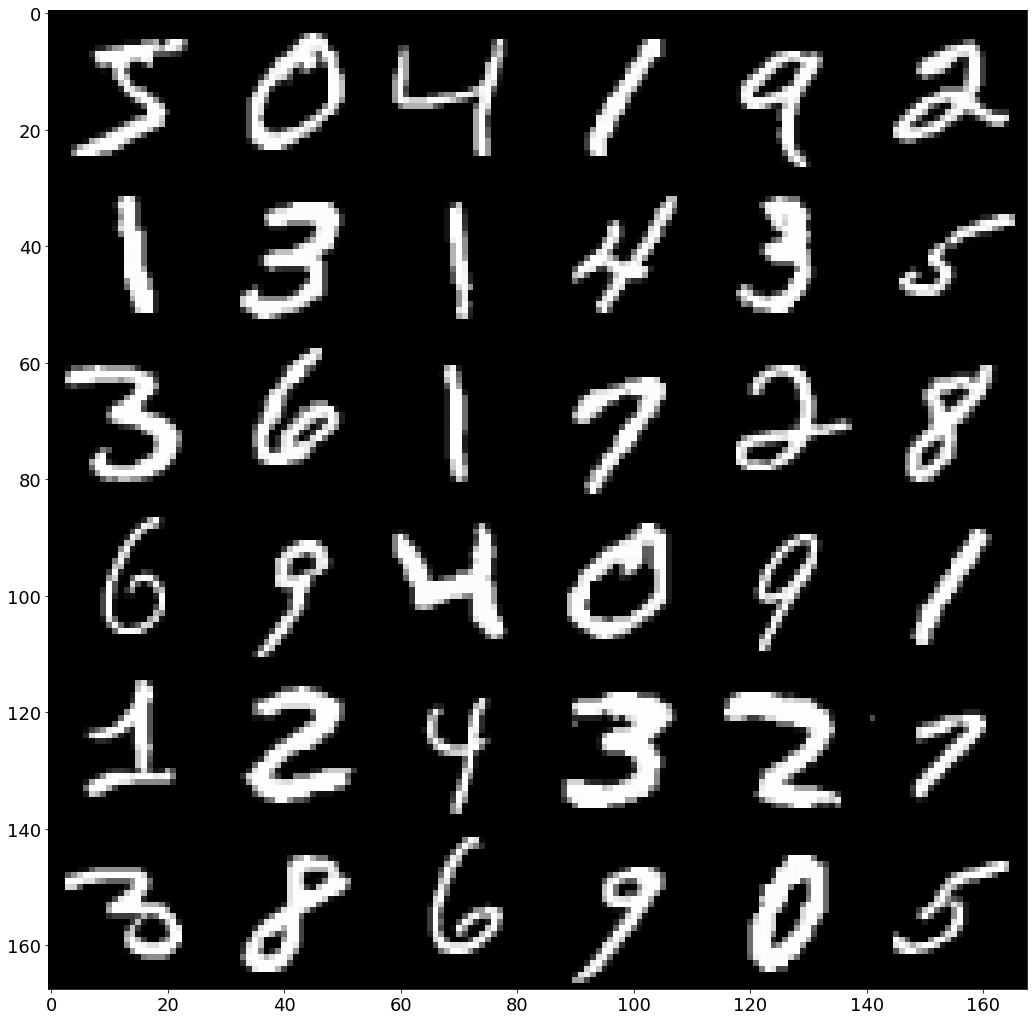

In [37]:
sq = show_img_square(X_trn[:36])
# sq = 255 - sq
plt.imshow(sq, cmap='gray', vmin=0, vmax=255)